In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os

In [2]:
# class that handles api interactions
class TMDBClient:    
    def __init__(self, api_key, base_url="https://api.themoviedb.org/3"):
        self.api_key = api_key
        self.base_url = base_url

    # fetch movies by popularity
    def fetch_popular_movies(self, pages=None):
        page = 1
        all_movies = []

        while True:
            url = f"{self.base_url}/movie/popular"
            params = {"api_key": self.api_key, "page": page}
            response = requests.get(url, params=params)
            response.raise_for_status()
            data = response.json()

            if "results" in data:
                all_movies.extend(data["results"])
                if pages and page >= pages:
                    break
                if page >= data["total_pages"]:
                    break
                page += 1
            else:
                break

        return all_movies

    # fetch movies by genre
    def fetch_movies_by_genre(self, genre_id, pages=1):
        all_movies = []
        for page in range(1, pages + 1):
            url = f"{self.base_url}/discover/movie"
            params = {"api_key": self.api_key, "with_genres": genre_id, "page": page}
            response = requests.get(url, params=params)
            response.raise_for_status()
            data = response.json()

            if "results" in data:
                all_movies.extend(data["results"])
            else:
                break

        return all_movies

    # fetch movies by year
    def fetch_movies_by_year(self, release_year, pages=1):
        all_movies = []
        for page in range(1, pages + 1):
            url = f"{self.base_url}/discover/movie"
            params = {"api_key": self.api_key, "primary_release_year": release_year, "page": page}
            response = requests.get(url, params=params)
            response.raise_for_status()
            data = response.json()

            if "results" in data:
                all_movies.extend(data["results"])
            else:
                break

        return all_movies

In [3]:
# class to handle data processing
class DataProcessor:    
    def __init__(self, raw_data):
        self.raw_data = raw_data

    def to_dataframe(self):
        # handles error when no data is on the page
        if not self.raw_data or len(self.raw_data) == 0:
            raise ValueError("No data to process.")
        
        df = pd.DataFrame(self.raw_data)
        df = df[["title", "release_date", "popularity", "vote_average"]]
        df.rename(columns={
            "title": "Title",
            "release_date": "Release Date",
            "popularity": "Popularity",
            "vote_average": "Rating"
        }, inplace=True)
        
        # convert 'Release Date' column to datetime
        df["Release Date"] = pd.to_datetime(df["Release Date"], errors="coerce")
        
        return df

In [4]:
# class to handle data visualizations
class Visualization:    
    def __init__(self, dataframe):
        self.dataframe = dataframe

    # plotting the popularity of the top N movies
    def plot_topN_movies(self, top_n=10):
        if self.dataframe.empty:
            print("No data to visualize.")
            return
        
        df_sorted = self.dataframe.sort_values(by="Popularity", ascending=False).head(top_n)
        plt.figure(figsize=(10, 6))
        plt.barh(df_sorted["Title"], df_sorted["Popularity"], color="blue")
        plt.xlabel("Popularity")
        plt.ylabel("Movie Title")
        plt.title(f"Top {top_n} Most Popular Movies")
        plt.gca().invert_yaxis() # to show the top movies in order from top to bottom of the graph
        plt.show()
    
    # plotting the trend of movie popularity over time
    def plot_trend(self):
        if "Release Date" not in self.dataframe.columns or self.dataframe["Release Date"].isnull().all():
            print("No release dates to visualize.")
            return
        
        self.dataframe["Year"] = self.dataframe["Release Date"].dt.year
        df_trend = self.dataframe.groupby("Year")["Popularity"].mean().reset_index()
        
        plt.figure(figsize=(10, 6))
        plt.plot(df_trend["Year"], df_trend["Popularity"], marker="o", color="blue")
        plt.title("Average Movie Popularity by Release Year")
        plt.xlabel("Year")
        plt.ylabel("Average Popularity")
        plt.grid(True)
        plt.show()

In [5]:
# loading API key
load_dotenv()
TMDB_API_KEY = os.getenv("TMDB_API_KEY")

# initializing client
client = TMDBClient(api_key=TMDB_API_KEY)

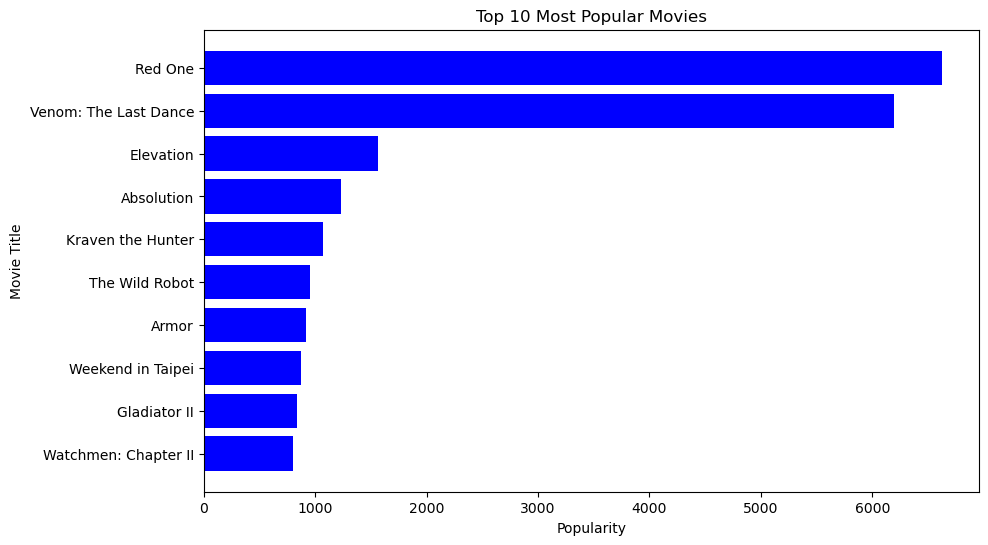

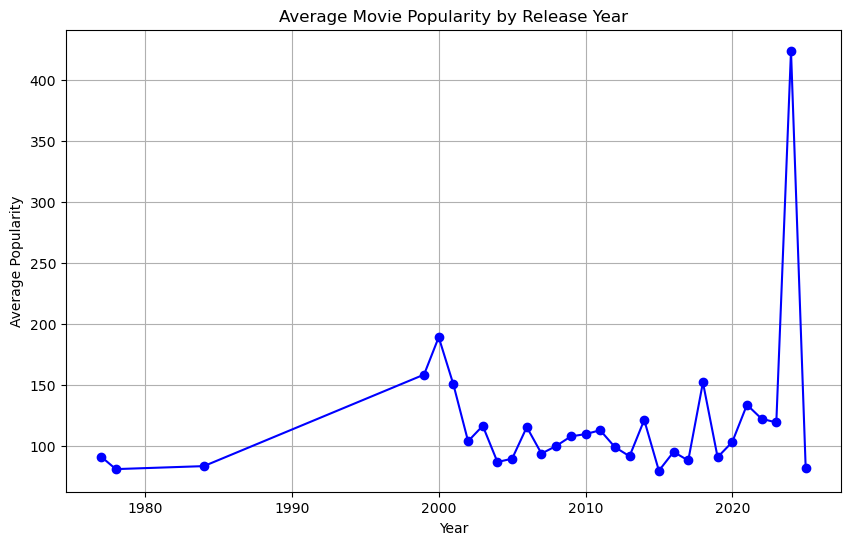

In [6]:
print ("Action Movie Data:")

# fetching movies by genre --> Action is genre_id=28
movies = client.fetch_movies_by_genre(genre_id=28, pages=10)

# process fetched movies into df
processor = DataProcessor(raw_data=movies)
df = processor.to_dataframe()

# visualizing the data
fig = Visualization(dataframe=df)
fig.plot_topN_movies(top_n=10)
fig.plot_trend()

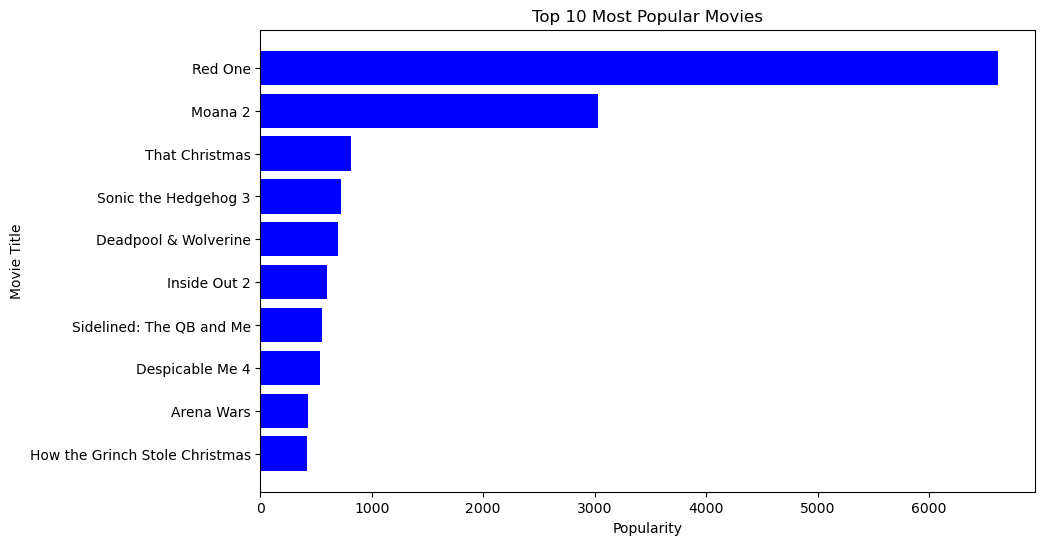

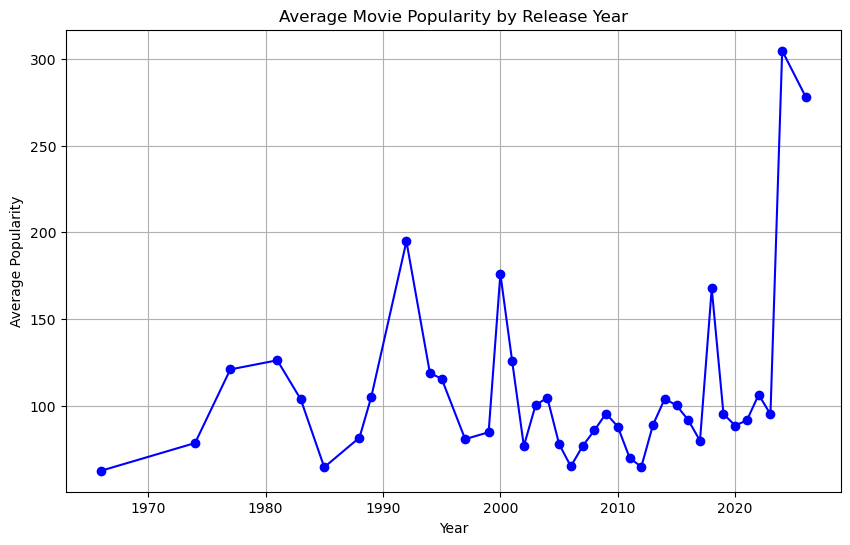

In [7]:
print ("Comedy Movie Data:")

# fetching movies by genre --> Comedy is genre_id=35
movies = client.fetch_movies_by_genre(genre_id=35, pages=10)

# process fetched movies into df
processor = DataProcessor(raw_data=movies)
df = processor.to_dataframe()

# visualizing the data
fig = Visualization(dataframe=df)
fig.plot_topN_movies(top_n=10)
fig.plot_trend()

Horror Movie Data:


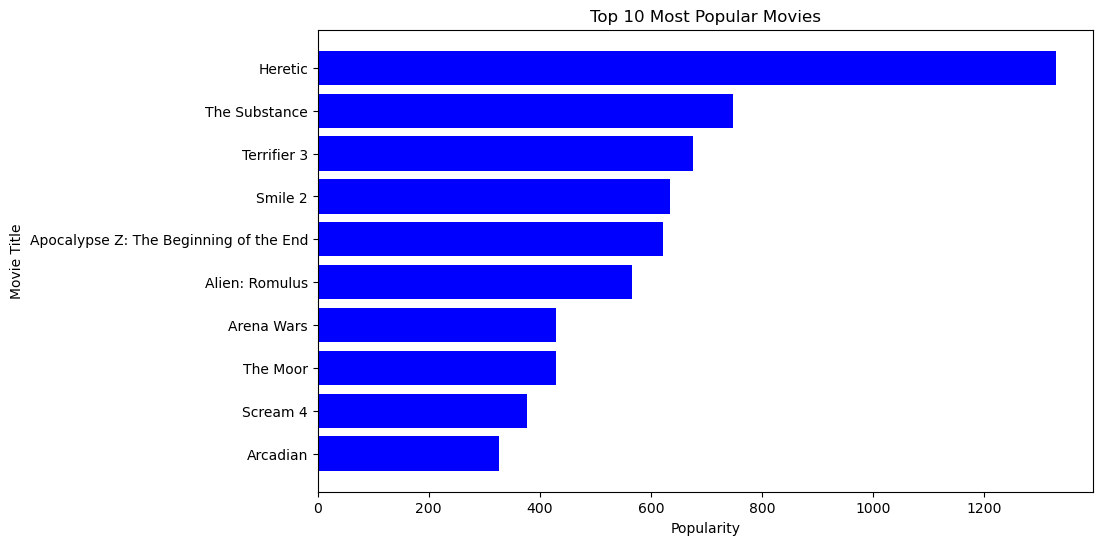

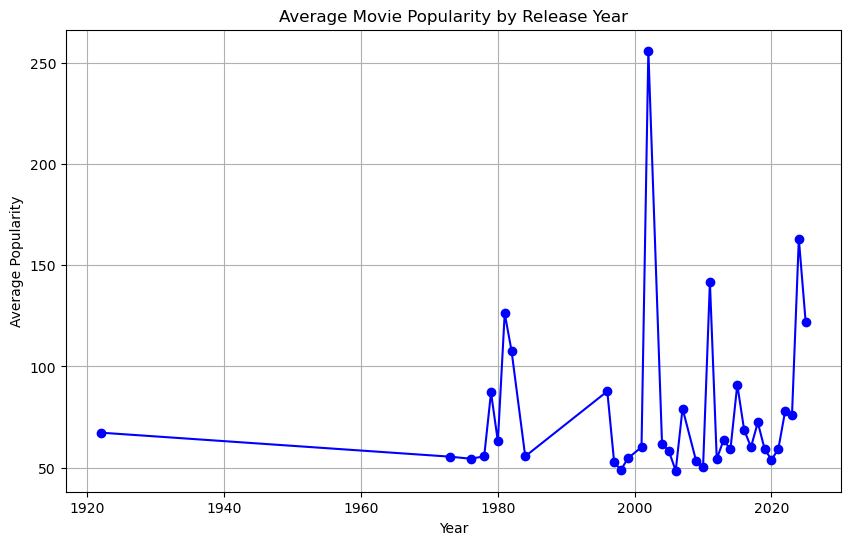

In [9]:
print ("Horror Movie Data:")

# fetching movies by genre --> Horror is genre_id=27
movies = client.fetch_movies_by_genre(genre_id=27, pages=10)

# process fetched movies into df
processor = DataProcessor(raw_data=movies)
df = processor.to_dataframe()

# visualizing the data
fig = Visualization(dataframe=df)
fig.plot_topN_movies(top_n=10)
fig.plot_trend()

Overall Movie Data:


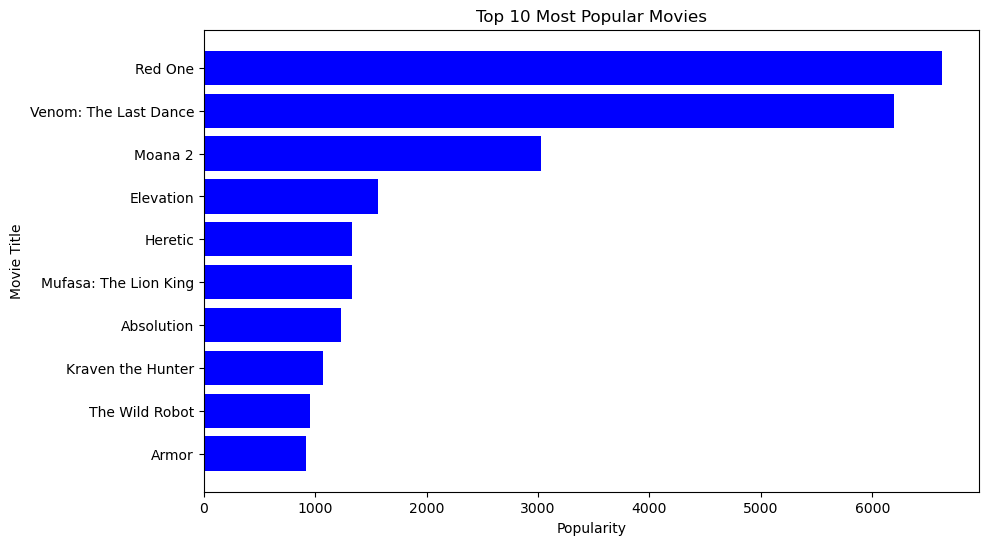

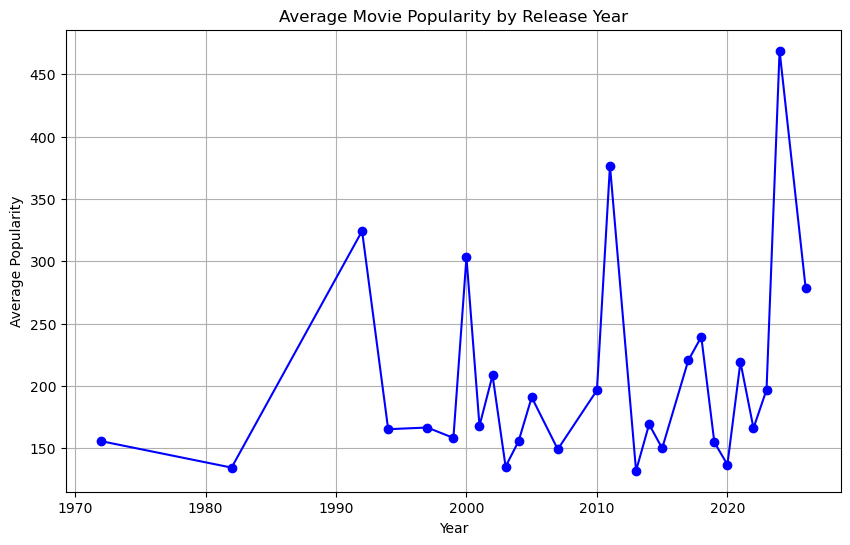

In [10]:
print ("Overall Movie Data:")

# fetching movies by popularity
movies = client.fetch_popular_movies(pages=10)

# process fetched movies into df
processor = DataProcessor(raw_data=movies)
df = processor.to_dataframe()

# visualizing the data
fig = Visualization(dataframe=df)
fig.plot_topN_movies(top_n=10)
fig.plot_trend()